<a href="https://colab.research.google.com/github/Aayush1130/Aayush1130/blob/main/Aayush_Maskey_project_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# project work by aayush maskey mayu
!pip install wget
import wget

In [ ]:
# step 1. Importing dataset
wget.download('https://archive.org/download/ages-and-heights/AgesAndHeights.pkl')

'AgesAndHeights (1).pkl'

In [ ]:
# step 2. Data visualization
import pandas as pd
data= pd.read_pickle('AgesAndHeights.pkl')
print(data)


          Age     Height
0   14.767874  59.627484
1    3.107671  36.146453
2    7.266917  46.912878
3    1.815180  29.125660
4   16.753758  68.170414
..        ...        ...
95   7.323712  46.857505
96   5.591509  39.339990
97   2.625606  32.918925
98   5.519293  40.704154
99  13.117413  55.177407

[100 rows x 2 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efff97d3c90>,
      dtype=object)

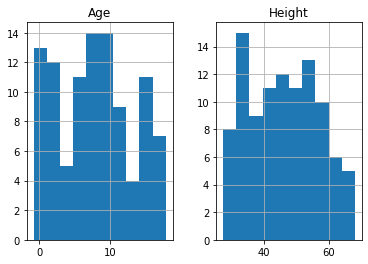

In [ ]:
data.hist()

In [ ]:
data.describe()

,Age,Height
count,100.000000,100.000000
mean,7.966138,45.955674
std,5.321621,10.787318
min,-0.780853,27.332513
25%,3.048885,36.320107
50%,7.795597,46.178251
75%,11.464331,53.994166
max,17.887852,68.170414


In [ ]:
#step 3. Data cleaning
cleaned_data= data[ data['Age']>0]
cleaned_data


,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


In [ ]:
cleaned_data.describe()



,Age,Height
count,93.000000,93.000000
mean,8.595192,47.164420
std,4.975428,10.190036
min,0.195686,29.007696
25%,5.020210,38.287710
50%,8.433330,47.332750
75%,11.923862,54.751892
max,17.887852,68.170414


In [ ]:
cleaned_data.corr()

,Age,Height
Age,1.00000,0.97722
Height,0.97722,1.00000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efff99ee0d0>,
      dtype=object)

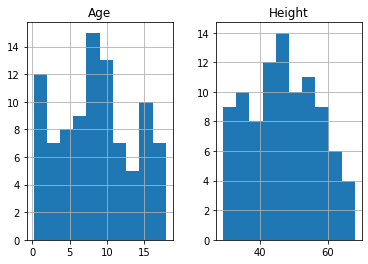

In [ ]:
# visualize the cleaned data
cleaned_data.hist()

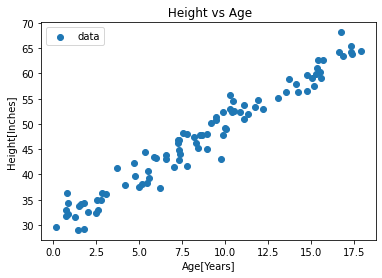

In [ ]:
import matplotlib.pyplot as plt
ages = cleaned_data['Age']
heights = cleaned_data['Height']
plt.scatter( ages , heights , label='data')
plt.title(' Height vs Age')
plt.xlabel('Age[Years]')
plt.ylabel( 'Height[Inches]')
plt.legend()


In [ ]:
# step 4 Build the model and train it 
parameters= { 'alpha': 40,'beta':4}




In [ ]:

def y_hat(  age , params):
  alpha= params['alpha']
  beta= params['beta']
  return alpha+beta*age
  age=int(input('enter age:'))
  y_hat(age,parameters)




In [ ]:
def learn_parameters(data, params):
    x, y = data['Age'], data['Height']
    x_bar, y_bar = x.mean(), y.mean()
    x, y = x.to_numpy(), y.to_numpy()
    beta = sum( ((x-x_bar) * (y-y_bar)) / sum( (x-x_bar)**2))
    alpha = y_bar - beta * x_bar
    params['alpha'] = alpha
    params['beta'] = beta
    

In [ ]:
new_parameter = {'alpha' : -2, 'beta' : 1000}
learn_parameters(cleaned_data, new_parameter)
new_parameter


{'alpha': 29.961857614615834, 'beta': 2.0014168989106302}

In [ ]:
spaced_ages = list(range(19))
spaced_untrained_predictions = [y_hat(x, parameters) for x in spaced_ages]
print(spaced_untrained_predictions)

[40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112]


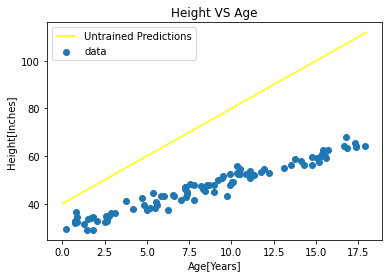

In [ ]:
# plotting spaced untrained predicted values 
ages = cleaned_data['Age']
heights = cleaned_data['Height']
plt.scatter(ages,heights, label='data')
plt.plot(spaced_ages, spaced_untrained_predictions, label = 'Untrained Predictions', color = 'yellow')
plt.title('Height VS Age')
plt.xlabel('Age[Years]')
plt.ylabel('Height[Inches]')
plt.legend()
plt.show()

Trained Predicted Values:  [29.961857614615834, 31.963274513526464, 33.96469141243709, 35.966108311347725, 37.96752521025836, 39.968942109168985, 41.97035900807961, 43.971775906990246, 45.97319280590088, 47.974609704811506, 49.97602660372213, 51.97744350263277, 53.9788604015434, 55.98027730045403, 57.981694199364654, 59.98311109827529, 61.98452799718592, 63.985944896096555, 65.98736179500717]


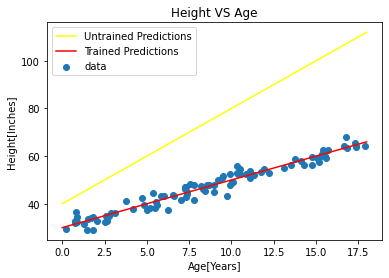

In [ ]:
#plotting spaced trained predicted values
spaced_trained_predictions = [y_hat(x, new_parameter) for x in spaced_ages]
print('Trained Predicted Values: ',spaced_trained_predictions)
plt.scatter(ages,heights, label='data')
plt.plot(spaced_ages, spaced_untrained_predictions, label = 'Untrained Predictions', color = 'yellow')
plt.plot(spaced_ages, spaced_trained_predictions, label = 'Trained Predictions', color = 'red')
plt.title('Height VS Age')
plt.xlabel('Age[Years]')
plt.ylabel('Height[Inches]')
plt.legend()
plt.show()

In [ ]:
# Make predictions on unseen data
new_age = int(input('enter age to predict height: '))
y_hat(new_age, new_parameter)
